# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


###### <a href=https://vahidmoosavi.com/> Vahid Moosavi </a>
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Fourth Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 11 October 2016</span>


### Topics to be discussed 

* Density Learning
* Meta-Parameters in Machine Learning
* Regression Problem
* Least Squares Method
    * Linear Regression
    * Polynomial Regression
    * Local Polynomial Regression

In [97]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline

# Density Learning 
## Or "Non-parametric Density Models"


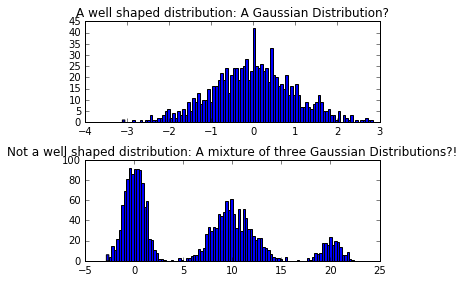

In [2]:
plt.subplot(2,1,1)
X1 = np.random.normal(loc=0,scale=1,size=1000)
plt.hist(X1,bins=100);
plt.title('A well shaped distribution: A Gaussian Distribution?')
plt.subplot(2,1,2)
X1 = np.concatenate((np.random.normal(loc=0,scale=1,size=1000) , np.random.normal(loc=10,scale=2,size=1000),np.random.normal(loc=20,scale=1,size=200)))
plt.title('Not a well shaped distribution: A mixture of three Gaussian Distributions?!')
plt.hist(X1,bins=100);
plt.tight_layout()

# Now the question is that can we learn these (not well shaped) distributions?


# Histograms
## The first and the most data driven density model is the histogram of the data itself!
* We just need to select bandwiths (or the number of bins) to descretize the observed data into groups
* Then, we count the number of observations within each group
* And then, we have it!

[   4.    5.   11.   10.   13.   29.   43.   62.   72.   81.  112.   89.
   99.   99.   76.   52.   59.   24.   22.   18.    8.    9.    2.    0.
    1.    0.    1.    5.    0.    2.    1.    3.    6.    2.    9.   14.
   18.   11.   14.   22.   27.   40.   26.   34.   40.   41.   42.   61.
   45.   63.   39.   63.   45.   47.   51.   34.   33.   34.   27.   21.
   25.   10.   14.    8.    4.    3.    8.    1.    0.    3.    2.    0.
    0.    0.    0.    2.    0.    3.    1.    3.    5.    5.    7.   12.
   18.   19.   17.   19.   17.   24.   13.   10.   10.    5.    6.    1.
    2.    0.    0.    2.]
[ -3.07574779  -2.81048597  -2.54522416  -2.27996235  -2.01470054
  -1.74943873  -1.48417691  -1.2189151   -0.95365329  -0.68839148
  -0.42312966  -0.15786785   0.10739396   0.37265577   0.63791758
   0.9031794    1.16844121   1.43370302   1.69896483   1.96422665
   2.22948846   2.49475027   2.76001208   3.02527389   3.29053571
   3.55579752   3.82105933   4.08632114   4.35158295   4.616

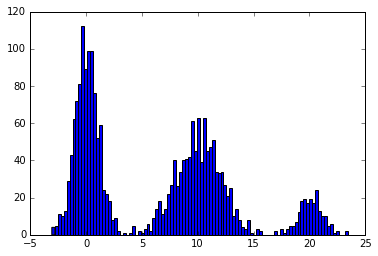

In [106]:
# X1 = np.random.randint(-1,2,size=400)
X1 = np.concatenate((np.random.normal(loc=0,scale=1,size=1000) , np.random.normal(loc=10,scale=2,size=1000),np.random.normal(loc=20,scale=1,size=200)))
# X1 = np.random.normal(loc=0,scale=1,size=200)

X1 = np.asarray(X1)
a = plt.hist(X1,bins=100);
# a[0] has the counts
print a[0]
# a[1] has the bins
print a[1]
print np.sum(a[0])

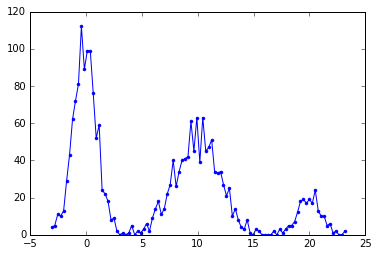

In [107]:
plt.plot(a[1][:-1],a[0],'.-');

# But this looks noisy!

# <a></a>

## Now if we want to do some smoothing (denoising), we are in the field of Kernel Density Estimation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/15255412d35488194b7e24e4518765e0af9992b5"width =700, height=700/>
<a></a>

## where K(•) is the kernel — a non-negative function that integrates to one and has mean zero — and h > 0 is a smoothing parameter called the bandwidth.

* **what happens here is that we draw a small distribution around each of the observed points and then, sum it over the whole range**
* ** These Kernels can be any of the parametric distributions we discusses before.**


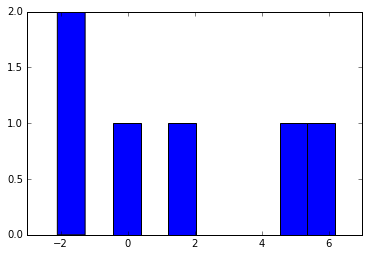

In [108]:
# A basic example with few data points

X1 = [-2.1,-1.3,-0.4,1.9,5.1,6.2]
X1 = np.asarray(X1)
a = plt.hist(X1,bins=10);

In [109]:
def GaussianKernel(u):
    # here we assume a "standard normal distribution" with mean zero and variance 1
    return np.exp(-1*np.power(u, 2)/2)/(np.sqrt(2*np.pi))


def Kde_Gaussian(h=3):
    mn = np.min(X1) -3
    mx = np.max(X1) +3
    
    # h is the Bandwidth
    
    
    # range of the the data
    xrng =  np.linspace(mn,mx,num=500)
    
    counts = np.zeros((1,500))
    
    
    # this is just to histogram of the data
    a = plt.hist(X1,bins=len(X1),normed=True);
    plt.close()
    for i,d in enumerate(a[0]):
        plt.plot([a[1][i],a[1][i]],[0,d],'-or',markersize=10);

    # Now we go through all the data points one by one. 
    # Assume that the observed point is the center of Gaussian Distribution with standard deviation equal to the bandwidth
    for xi in X1:
        local_counts = [GaussianKernel((x-xi)/h) for x in xrng]
        # (x-xi)/h is to transform the data to "standard normal distribution"!
        
        counts = counts + np.asarray(local_counts)/(h*len(X1))
        
        # this to normalize the counts. Look at the formula above
        plt.plot(xrng,np.asarray(local_counts)/(h*len(X1)),'r');
    
    plt.plot(xrng,counts.T,linewidth=4);

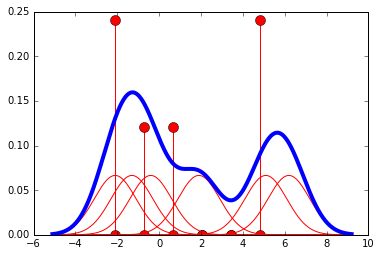

In [110]:
Kde_Gaussian(1)

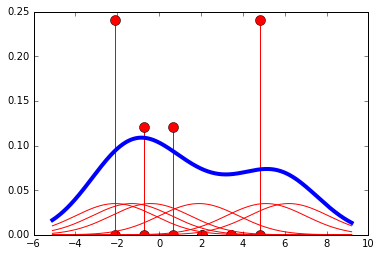

In [111]:
from ipywidgets import interact, HTML, FloatSlider
interact(Kde_Gaussian,h=(.1,5,.1));

## So, now what is the optimum bandwidth in the above density learning problem? 
* minimizing some error functions in relation to the bandwidth
* Rules of thumb methods
* cross validation ---> testing the learned density with new data sets


# A note on the issue of meta-parameters in Data Driven Modeling 



### Bandwidth value is usually called a " Meta-Parameter" or "Hyper-Parameter". It is important to know that in all of data driven modeling techniques, we will always have these types of parameters, where we need to find their best values in a "Meta- optimization" problem. 
### Usually, we take any of the following approaches separately, or together:
* **Exhaustive search**
* **Random grid search**
* **Cross Validation**

# <a></a>


# <a></a>

# <a></a>

# Density Learning in Practice

# However, usually there are optimum libraries for these kinds of tasks!
* **Scipy**
* **Scikit learn**
* **PyQt-Fit**

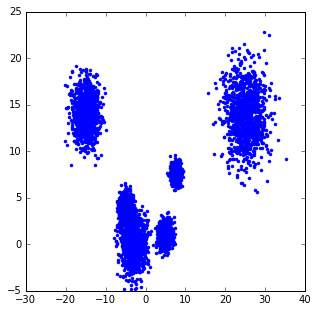

In [112]:
# A two dimensional example
fig = plt.figure()
d0 = 1.6*np.random.randn(1000,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')

d1 = .6*np.random.randn(1000,2)+7.6
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = .8*np.random.randn(1000,2)
d2[:,0]= d2[:,0] + 5
d2[:,1]= d2[:,1] + 1
plt.plot(d2[:,0],d2[:,1],'.b')

d3 = .8*np.random.randn(1000,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(1000,2)
d4[:,0]= d4[:,0] - 15
d4[:,1]= d4[:,1] + 14
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 2.8*np.random.randn(1000,2)
d5[:,0]= d5[:,0] + 25
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')

fig.set_size_inches(5,5)
Data = np.concatenate((d0,d1,d2,d3,d4,d5))



# from scipy import stats
# def measure(n):
#     "Measurement model, return two coupled measurements."
#     m1 = np.random.normal(size=n)
#     m2 = np.random.normal(scale=0.5, size=n)
#     return m1+m2, m1-m2

# m1, m2 = measure(2000)
m1,m2 = Data[:,0],Data[:,1]

xmin = Data[:,0].min()
xmax = Data[:,0].max()
ymin = Data[:,1].min()
ymax = Data[:,1].max()
Xg, Yg = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

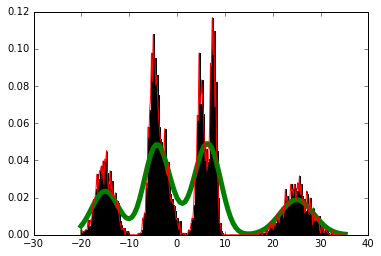

In [113]:
val_grids = Xg
# values = np.vstack([m1, m2])
# values = Data.T
kernel = stats.gaussian_kde(Data[:,0])
Z = kernel(val_grids.ravel())


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
a = ax.hist(Data[:,0],bins=300,normed=True);


ax.plot(val_grids.ravel(),Z,linewidth=5);
ax.plot(a[1][:-1],a[0])
plt.show()

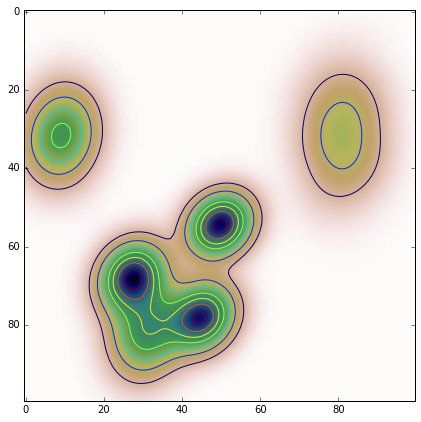

In [114]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([m1, m2])
values = Data.T
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,)
plt.contour(np.rot90(Z))
# ax.plot(m1, m2, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
fig.set_size_inches(7,7)
plt.show()

<span style="color:red;font-size: 3em;line-height: 100%;"> The importance of the learned densities </span>

* **Resampling**: to generate data without observations
* **Clustering and pattern recognition** and its relation to **"Manifold Learning"**
    * Here we know the likelihood of the high dimensional patterns in comparison to each other
    * Here, in a way we are learning the **joint probability distributions**
    * In Machine Learning terms, this is an **unsupervised learning** problem
* **Prediction**: Using it for predictions/ transfer function by conditioning the outcomes to a set of dimensions
    * In this case, we are interested to know the likelihood of certain variables (**dependent variables**) conditioned on certain variables (** independent variables")
    * In this sense, we can derive "supervised learning" from "unsupervised learning"
    

## A similar Approach
* **Gaussian Mixture Model**: To learn the distribution of the data as a weighted sum of several globally defined Gaussian Distributions:
##  $$g(X) = \sum_{i = 1}^k p_i. g(X,\theta_i)$$
### $ g(X,\theta_i)$ is a parametric known distribution (e.g. Gaussian) and $p_i$ is the share of each  of them. 

### Further readings:
* ** on Kernel Methods: http://www.stat.rice.edu/~scottdw/ss.nh.pdf**
* **On mixture Models: https://en.wikipedia.org/wiki/Mixture_model**



# <a></a>
## An alternative approach from ML (Hopefully the next session):
## Manifold Learning
* **Self Organizing Maps**





<hr style="height:3px;border:none;color:stillblue;background-color:black;" />



<hr style="height:3px;border:none;color:stillblue;background-color:black;" />


# Prediction Using the learned Densities

### An example of prediction with the learned density in the previous example

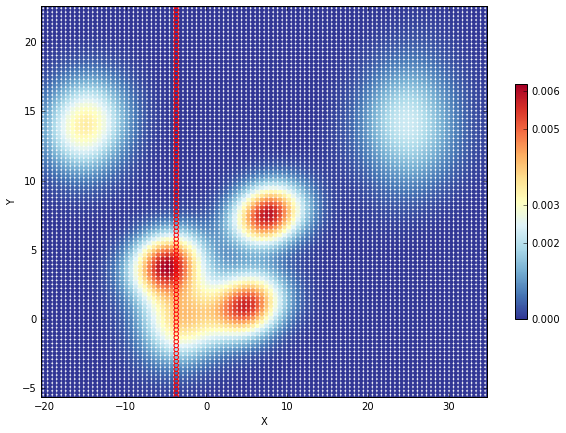

In [12]:
fig = plt.figure(figsize=(10,7))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
cm = plt.cm.get_cmap('RdYlBu_r')
positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([m1, m2])
values = Data.T
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
zmn = np.min(Z)
zmx = np.max(Z)
rng = zmx-zmn
Z = Z.ravel()
X = X.ravel()
Y = Y.ravel()
# for i in range(len(X)):
var = (Z-zmn)/float(rng)
# sc = plt.scatter(X, Y, s=10, marker=u'o', facecolor=plt.cm.RdYlBu_r(var), vmin=zmn, vmax=zmx, edgecolor='None')
sc = plt.scatter(X,Y,c = Z,s=20,vmin=zmn,marker='o',edgecolor='None', vmax=zmx, cmap=cm ,alpha=1);

plt.colorbar(sc,ticks=np.round(np.linspace(zmn,zmx,5),decimals=3),shrink=0.6);

sc = plt.scatter(X[3000:3100],Y[3000:3100],c = Z[3000:3100],s=20,vmin=zmn,marker='o',edgecolor='red', vmax=zmx, cmap=cm ,alpha=1);
plt.xlim(xmin,xmax);
plt.ylim(ymin,ymax);
plt.xlabel('X');
plt.ylabel('Y');

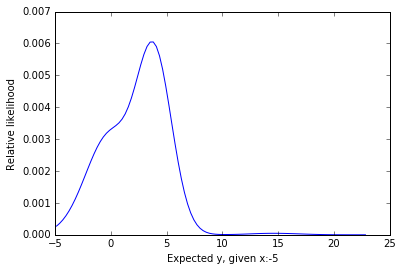

In [115]:
# For example, here we fix x to a specific value and would like to know what are the possible y values
x = -5
X, Y = np.mgrid[x:x+1:1j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([m1, m2])
Z = np.reshape(kernel(positions).T, X.shape)

plt.plot(Y.T,Z.T);
plt.ylabel('Relative likelihood');
plt.xlabel('Expected y, given x:{}'.format(x));

<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
<span style="color:red;font-size: 2em;line-height: 100%;"> From joint probability models to targeted Models </span>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# Regression problem
### In comparison to density learning we have the problem of targeted learning


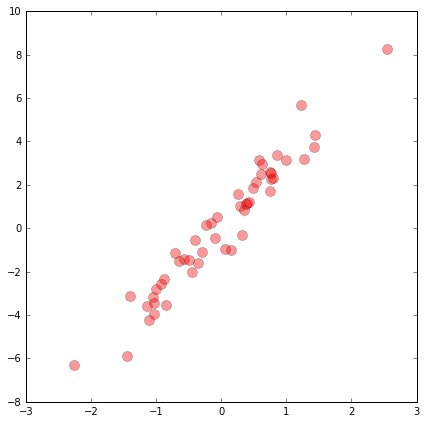

In [116]:
N = 50
x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.7, size=N)[:,np.newaxis]
# y = 2*x1
# y = x1*x1 + np.random.normal(loc=.0, scale=0.6, size=N)[:,np.newaxis]
# y = 2*x1*x1

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'or',markersize=10,alpha=.4 );

# How  to approache this problem?

<span style="color:red;font-size: 2em;line-height: 100%;"> Least Squares Method. </span>
*  **Legendre 1805**
* **Gauss 1809**

### Imagine we want to estimate the observed pattern with a parametric function such as follows
## $$f(x,\beta) = \sum_{j = 0}^m \beta_j x^j\ $$

### First order linear regression:
## $$f(x,\beta) = \beta_0 + \beta_1 x  $$

## Squared Residuals
##  $$S = \sum_{i = 1}^n (y_i - f(x_i,\beta))^2 = \sum_{i = 1}^n r^2$$

### Least Squeares method is to minimize the above error term by finding the optimum value of $\beta$

### While, in linear regression, it is easy to find the optimum parameters, for nonlinear cases we need iterative methods.
* Linear: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Motivational_example
* Nonlinear: https://en.wikipedia.org/wiki/Non-linear_least_squares

<span style="color:red;font-size: 2.5em;line-height: 100%;"> Underlying ideas behing least squares method is the essense of many (all of) machine learning methods. </span>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# Intuitive interpretations to the least squares method

* **solving the equations of forces of several of (selfish) bodies to the line**
* **finding the line with the minimum energy and maximum stability** 
* **Looking at it as a democratic voting system with a apriori given structure**

## And once again it's all about the inversion from knowing to learning
### The first historical example, from Wikipedia:
An early demonstration of the strength of Gauss' Method came when it was used **to predict the future location of the newly discovered asteroid Ceres**. On 1 January 1801, the Italian astronomer Giuseppe Piazzi discovered Ceres and was able to track its path for 40 days before it was lost in the glare of the sun. Based on these data, astronomers desired to determine the location of Ceres after it emerged from behind the sun ** without solving Kepler's complicated nonlinear equations of planetary motion**. The only predictions that successfully allowed Hungarian astronomer Franz Xaver von Zach to relocate Ceres were those performed by the 24-year-old Gauss using least-squares analysis.


In [117]:
def linear_regressor(a,b):
    # y_ = ax+b
    mn = np.min(x1)
    mx = np.max(x1)
    xrng =  np.linspace(mn,mx,num=500)
    y_ = [a*x + b for x in xrng]
    
    
    fig = plt.figure(figsize=(7,7))
    ax1= plt.subplot(111)
    plt.plot(x1,y,'or',markersize=10,alpha=.4 );
    plt.xlabel('x1');
    plt.ylabel('y');
    plt.plot(xrng,y_,'-b',linewidth=1)
#     plt.xlim(mn-1,mx+1)
#     plt.ylim(np.min(y)+1,np.max(y)-1)
    
    yy = [a*x + b for x in x1]
    
    [plt.plot([x1[i],x1[i]],[yy[i],y[i]],'-r',linewidth=1) for i in range(len(x1))];
    print 'average squared error is {}'.format(np.mean((yy-y)**2))

average squared error is 1.60389423062


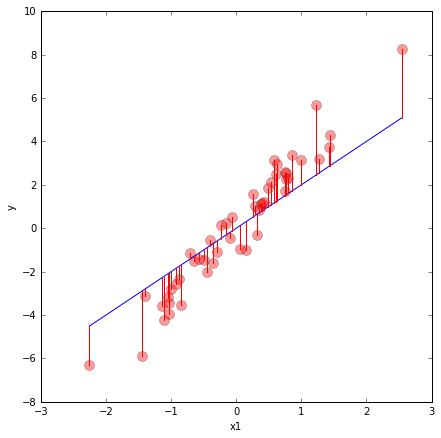

In [118]:
linear_regressor(2,0)

average squared error is 8.1752578637


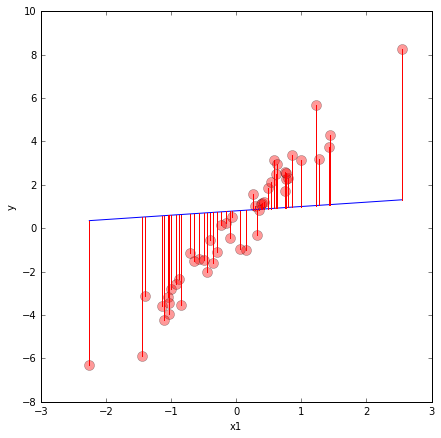

In [120]:
from ipywidgets import interact, HTML, FloatSlider
interact(linear_regressor,a=(-3,6,.2),b=(-2,5,.2));

# Finding optimum parameters by grid search
### For the case of linear regression it is easy to find the optimum parameters analytically
* Linear: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Motivational_example

In [121]:
# Linear regression
A,B =np.mgrid[-6:6:200j,-5:5:200j]
A =A.ravel()
B =B.ravel()
losses = []
r2s = []
for i in range(len(A)):
    r2 = ([A[i]*x + B[i] for x in x1]-y)**2
    r2s.append(r2)

In [122]:
def calculate_loss(r2s,loss='mean'):
    if loss == 'mean':
        return [np.mean(r2) for r2 in r2s]
    if loss == 'variation':
        return [np.std(r2) for r2 in r2s]
    if loss == 'skewness':
        return np.abs([stats.skew(r2) for r2 in r2s])
    if loss == 'kurtosis':
        return np.abs([stats.kurtosis(r2) for r2 in r2s])

a*: 3.16582914573 and b*: 0.0753768844221 and the minimum loss is 0.510470518374
average squared error is 0.510470518374


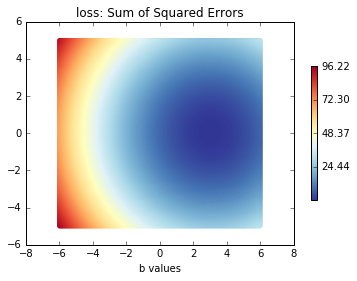

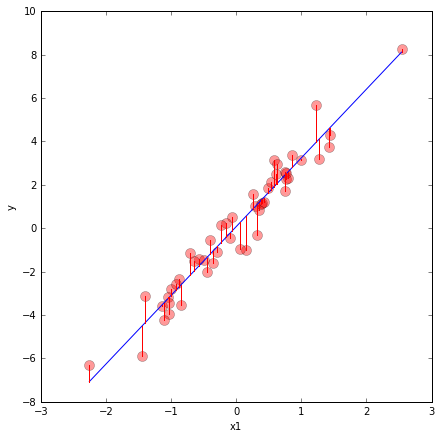

In [123]:
losses = calculate_loss(r2s,loss='mean')
lossmn = np.min(losses)
lossmx = np.max(losses)

sc = plt.scatter(A,B,c = losses,s=20,vmin=lossmn,marker='o',edgecolor='None', vmax=lossmx, cmap=cm ,alpha=1);
plt.colorbar(sc,ticks=np.round(np.linspace(lossmn,lossmx,5),decimals=3),shrink=0.6);
plt.xlabel('a values')
plt.xlabel('b values')
plt.title('loss: {}'.format('Sum of Squared Errors'))

ind_min = np.argmin(losses)
amn = A[ind_min]
bmn = B[ind_min]
print 'a*: {} and b*: {} and the minimum loss is {}'.format(amn,bmn,losses[ind_min])
linear_regressor(amn,bmn)

# polynomial regression
## $$f(x,\beta) = \sum_{j = 0}^m \beta_j x^j\ $$

# Regression problem from the point of view of linear algebra

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5d8c7215ea8715037794889054530c5b7ea2f498" width =700, height=700/>
## Or
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/76fdc21f089f8b3c5979010bddd1007a34bbeca1" width =200, height=700/>

## And the solution is

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3dc6b1498895d5833137e28eafc4534844145a47" width =200, height=700/>



<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

<span style="color:red;font-size: 2.5em;line-height: 100%;"> Looking at this formula we can say that polynomial regression can be seen as a type of multiple regression, where different powers of x (from 0,..,m) are new features. </span>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />




<hr style="height:4px;border:none;color:stillblue;background-color:black;" />
# Now Regression in practice using Scikit-learn
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />

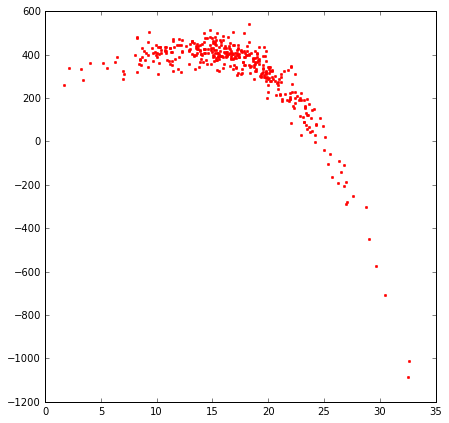

In [124]:
N = 400
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]

# x1 = np.random.uniform(size=N)[:,np.newaxis]
# y = np.sin(2*np.pi*x1**3)**3 + .1*np.random.randn(*x1.shape)

y =-.1*x1**3 + 2*x1*x1 + 2*np.sqrt(x1)+ 10*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]


fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'.r',markersize=5,alpha=1 );

In [127]:
def polynomial_regr(degree=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    
    
    
    X_tr = x1[:].astype(float)
    y_tr = y[:].astype(float)
    
#     X_ts = x1[150:]
#     y_ts = y[150:]
    
    poly = PolynomialFeatures(degree=degree)
    X_tr_ = poly.fit_transform(X_tr)
#     X_ts_ = poly.fit_transform(X_ts)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    
    y_pred_tr = regr.predict(X_tr_)[:]
#     y_pred_ts = regr.predict(X_ts_)[:]
    # Predicting the training data
    plt.plot(X_tr,y_tr,'.r',markersize=10,alpha=.4 );
    plt.plot(X_tr,y_pred_tr,'.b',markersize=10,alpha=.4 );

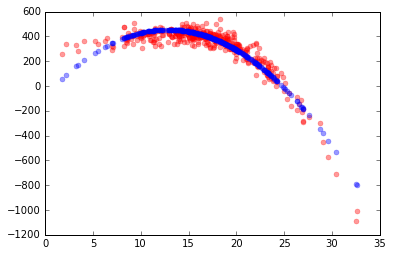

In [129]:
polynomial_regr(degree=2)

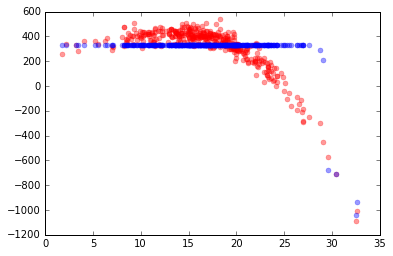

In [130]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,150,1));


# Limits of  polynomial regression
### 1- They can't get better after a certain threshold (e.g. polynomial degree)
### 2- They suffer from the curse of dimensionality
### 3- Ther training time increases exponentially by using higher polynomial degrees
### 4- Assumes functional relations between variables
### 5- Structural assumptions about the form of functions

<hr style="height:4px;border:none;color:stillblue;background-color:black;" />
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />




# <a></a>
# <a></a>


## Limits of Regression Models
### They can't get better after a certain threshold (e.g. polynomial degree)

In [131]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
y_preds = pd.DataFrame(data=np.zeros((y.shape[0],0)))
ARE = pd.DataFrame(data=np.zeros((y.shape[0],0)))
MAE = pd.DataFrame(data=np.zeros((1,0)))


training_times = []
max_degree = 40
for degree in range(1,max_degree):   
    poly = PolynomialFeatures(degree=degree)
    x1_ = poly.fit_transform(x1)
    
    
    t0 = time.time()
    regr = linear_model.LinearRegression()
    regr.fit(x1_, y)
    
    print 'dimension of training data for polynomial degree {} is {}'.format(degree,x1_.shape[1])
    print 'degree {} is done in {} seconds'.format(degree,time.time()-t0)
    
    y_pred = regr.predict(x1_)[:]
    
    
    
    y_preds['degree-{}'.format(degree)] = y_pred
    MAE['degree-{}'.format(degree)] = np.mean(np.abs(y_pred-y))
    ARE['degree-{}'.format(degree)] = 100*np.abs(y_pred-y)/y
    
    

dimension of training data for polynomial degree 1 is 2
degree 1 is done in 0.000807046890259 seconds
dimension of training data for polynomial degree 2 is 3
degree 2 is done in 0.000535011291504 seconds
dimension of training data for polynomial degree 3 is 4
degree 3 is done in 0.000560998916626 seconds
dimension of training data for polynomial degree 4 is 5
degree 4 is done in 0.000588178634644 seconds
dimension of training data for polynomial degree 5 is 6
degree 5 is done in 0.000345945358276 seconds
dimension of training data for polynomial degree 6 is 7
degree 6 is done in 0.000360012054443 seconds
dimension of training data for polynomial degree 7 is 8
degree 7 is done in 0.000356912612915 seconds
dimension of training data for polynomial degree 8 is 9
degree 8 is done in 0.000396013259888 seconds
dimension of training data for polynomial degree 9 is 10
degree 9 is done in 0.000745058059692 seconds
dimension of training data for polynomial degree 10 is 11
degree 10 is done in 0.

In [133]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE.shape[1])),index=quality,columns=ARE.columns)
for percent in quality:
    for m in range(ARE.shape[1]):
        a = ARE.values[:,m]
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
#         percentiles.ix[percent,m]= 100*(a<=percent).sum()/float(a.shape[0])
percentiles
med_error = pd.DataFrame(data=ARE.median(axis=0).values[:][np.newaxis,:].copy(),columns=ARE.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.ix[:] = np.around(percentiles.values[:],decimals=2)
# percentiles.index.name = 'ARE'
percentiles.T

,median,1,5,10,15,20
degree-1,18.09,6.50,16.25,30.00,41.25,56.25
degree-2,8.23,11.00,34.25,57.75,70.50,79.00
degree-3,7.23,14.50,35.75,62.75,77.00,83.50
degree-4,7.22,14.25,35.75,61.75,77.00,83.50
degree-5,7.02,14.00,35.75,62.50,76.50,84.25
degree-6,7.01,13.50,35.00,62.50,76.25,84.25
degree-7,6.99,13.50,35.50,62.25,76.00,84.25
degree-8,6.96,13.50,34.75,62.25,76.00,83.75
degree-9,6.93,12.75,36.00,61.75,75.50,84.25
degree-10,6.90,13.25,35.75,62.25,76.25,84.00


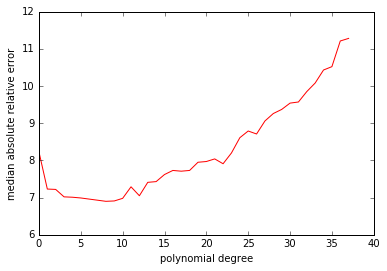

In [134]:
ax1 = plt.subplot(111)
# plt.title('degree-{} ARE for ts'.format(degree))
plt.plot(percentiles.T['median'].values[1:],'r')
plt.xlabel('polynomial degree')
plt.ylabel('median absolute relative error')

## Limits of Regression Models
### They suffer from the curse of dimensionality 
### The training time increases exponentially by using higher polynomial degrees

### An example, by real estate data
### predicting the rental price of houses

In [135]:
path = './Images/rentalprice.csv'
rental = pd.read_csv(path)
rental.head()

,Rent,ZIP,Type_Apartment,Type_Duplex,Type_Single house,Type_Studio,Rooms,Year built,Living space,lng,lat
0,645.0,5000,1.0,0.0,0.0,0.0,1.0,1954.0,28.0,8.041672,47.397999
1,1340.0,5000,1.0,0.0,0.0,0.0,4.0,1971.0,88.0,8.057444,47.379288
2,1380.0,5000,1.0,0.0,0.0,0.0,3.0,1968.0,69.0,8.057165,47.378022
3,1480.0,5000,1.0,0.0,0.0,0.0,3.5,1976.0,81.0,8.057974,47.400780
4,1500.0,5000,1.0,0.0,0.0,0.0,4.0,1968.0,80.0,8.057165,47.378022


In [136]:
# To separate training and testing data from each other

import random
Target = 0

#Data Selection
Mat_all = rental.ix[:,:].copy()


a = range(Mat_all.shape[1])
ind_col = a !=np.tile(Target,(len(a)))
Tr_data_size = int(.6*Mat_all.shape[0])
print Tr_data_size
ind_row_train = random.sample(range(Mat_all.shape[0]),Tr_data_size)
ind_row_test = range(Mat_all.shape[0])
for i in ind_row_train:
    ind_row_test.remove(i)
print len(ind_row_test)


#This is fixed always
y_tr = Mat_all.values[ind_row_train].astype(float)
y_tr= y_tr[:,Target].astype(float)

y_ts = Mat_all.values[ind_row_test].astype(float)
y_ts = y_ts[:,Target].astype(float)



X_tr = Mat_all.values[ind_row_train].astype(float) 
X_tr = X_tr[:,ind_col].astype(float) 
            
std = X_tr.std(axis=0)
randomization = 1e-25*np.random.randn(X_tr.shape[0],1)
ind_std0 = std==0
X_tr[:,ind_std0] = X_tr[:,ind_std0] + randomization 
            
X_ts = Mat_all.values[ind_row_test].astype(float)
X_ts = X_ts[:,ind_col].astype(float)

12599
8400


dimension of training data for polynomial degree 1 is 11
degree 1 is done in 0.00298714637756 seconds
dimension of training data for polynomial degree 2 is 66
degree 2 is done in 0.0219678878784 seconds
dimension of training data for polynomial degree 3 is 286
degree 3 is done in 0.110100984573 seconds
dimension of training data for polynomial degree 4 is 1001
degree 4 is done in 0.64661693573 seconds
dimension of training data for polynomial degree 5 is 3003
degree 5 is done in 6.69500994682 seconds


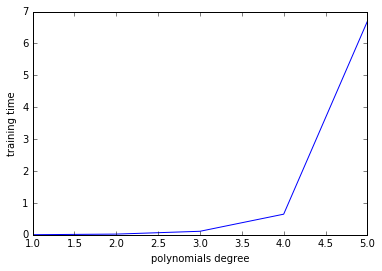

In [137]:
import time
y_preds_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
ARE_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
MAE_tr = pd.DataFrame(data=np.zeros((1,0)))

y_preds_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
ARE_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
MAE_ts = pd.DataFrame(data=np.zeros((1,0)))

training_times = []
max_degree = 6
for degree in range(1,max_degree):   
    poly = PolynomialFeatures(degree=degree)
    X_tr_ = poly.fit_transform(X_tr)
    X_ts_ = poly.fit_transform(X_ts)
    
    t0 = time.time()
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    print 'dimension of training data for polynomial degree {} is {}'.format(degree,X_tr_.shape[1])
    training_times.append(time.time()-t0)
    print 'degree {} is done in {} seconds'.format(degree,time.time()-t0)
    
    y_pred_tr = regr.predict(X_tr_)[:]
    y_pred_ts = regr.predict(X_ts_)[:]
    
    
    y_preds_tr['degree-{}'.format(degree)] = y_pred_tr
    MAE_tr['degree-{}'.format(degree)] = np.mean(np.abs(y_pred_tr-y_tr))
    ARE_tr['degree-{}'.format(degree)] = 100*np.abs(y_pred_tr-y_tr)/y_tr
    
    
    y_preds_ts['degree-{}'.format(degree)] = y_pred_ts
    MAE_ts['degree-{}'.format(degree)] = np.mean(np.abs(y_pred_ts-y_ts))
    ARE_ts['degree-{}'.format(degree)] = 100*np.abs(y_pred_ts-y_ts)/y_ts

plt.plot(range(1,max_degree),training_times)
plt.xlabel('polynomials degree')
plt.ylabel('training time')


In [138]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE_tr.shape[1])),index=quality,columns=ARE_tr.columns)
for percent in quality:
    for m in range(ARE_tr.shape[1]):
        a = ARE_tr.values[:,m]
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
#         percentiles.ix[percent,m]= 100*(a<=percent).sum()/float(a.shape[0])
percentiles
med_error = pd.DataFrame(data=ARE_tr.median(axis=0).values[:][np.newaxis,:].copy(),columns=ARE_tr.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.ix[:] = np.around(percentiles.values[:],decimals=2)
# percentiles.index.name = 'ARE'
percentiles.T

,median,1,5,10,15,20
degree-1,14.05,3.87,19.47,37.20,52.50,64.69
degree-2,13.35,4.21,20.64,39.14,54.85,67.23
degree-3,12.14,4.57,22.61,42.73,58.53,70.41
degree-4,11.63,4.75,23.11,43.98,60.47,72.50
degree-5,10.84,5.00,24.51,46.64,63.62,75.64


In [139]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE_ts.shape[1])),index=quality,columns=ARE_ts.columns)
for percent in quality:
    for m in range(ARE_ts.shape[1]):
        a = ARE_ts.values[:,m]
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
#         percentiles.ix[percent,m]= 100*(a<=percent).sum()/float(a.shape[0])
percentiles
med_error = pd.DataFrame(data=ARE_ts.median(axis=0).values[:][np.newaxis,:].copy(),columns=ARE_ts.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.ix[:] = np.around(percentiles.values[:],decimals=2)
# percentiles.index.name = 'ARE'
percentiles.T

,median,1,5,10,15,20
degree-1,13.85,4.19,19.82,37.33,53.15,65.18
degree-2,13.24,3.99,21.25,39.62,55.11,67.02
degree-3,12.43,4.68,22.89,42.15,58.27,70.23
degree-4,11.86,4.98,23.76,43.58,60.14,71.69
degree-5,11.10,5.51,24.96,45.95,63.02,74.62


# Limits of Regression Models
## Non-continuous patterns (Clustered Data)

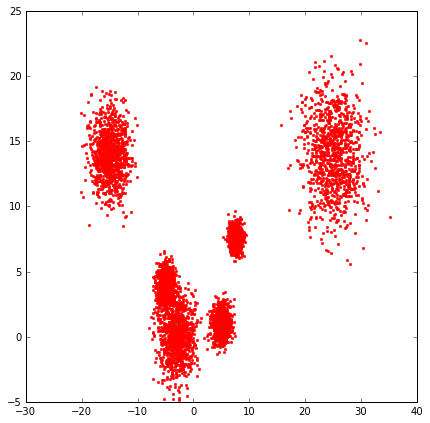

In [140]:
N = 500
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]
# y = 2*x1
x1 = np.concatenate((np.random.normal(loc=10,scale=.9,size=N) , np.random.normal(loc=13,scale=.2,size=N),np.random.normal(loc=5,scale=.1,size=N)))[:,np.newaxis]


y =-.1*x1**3 + 2*x1*x1 + 7*np.sin(x1) + 3*np.sqrt(x1)+ 1*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]

# x_tmp = x1.copy()
# x1 = y
# y = x_tmp

x1 = Data[:,0][:,np.newaxis]
y = Data[:,1][:,np.newaxis]

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'.r',markersize=5,alpha=1 );



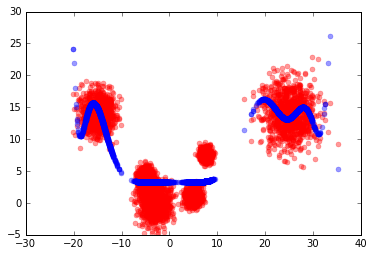

In [141]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,50,1));

<hr style="height:4px;border:none;color:stillblue;background-color:black;" />
# Extensions to the original regression problem:
## Local Polynomial Regression
## Nonlinear Regression and curve fitting
## Basis functions
## Generalized Linear Models

<hr style="height:4px;border:none;color:stillblue;background-color:black;" />
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />




# <a></a>
# <a></a>


<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# An Example: Local Polynomial Regression
### Using kernel smoother to give more imortance on local information.

### Original Least Squares Model:
###  $$S = \sum_{i = 1}^n (x_i - f(x_i,\beta))^2 = \sum_{i = 1}^n r^2$$


### Local Least Squares Model:

### $$\hat{f}_n(x) = argmin_{f} \sum_i K\left(\frac{x-x_i}{h}\right) \left(y_i -  f(x-x_i)\right)^2$$

Compare it with the kernel denisty learning we had above. 


### $$\hat{f}_n(x) = argmin_{f} \sum_i K\left(\frac{x-x_i}{h}\right) \left(y_i - a_0 - a_1(x-x_i) - \ldots - a_n\frac{(x-x_i)^n}{n!}\right)^2$$

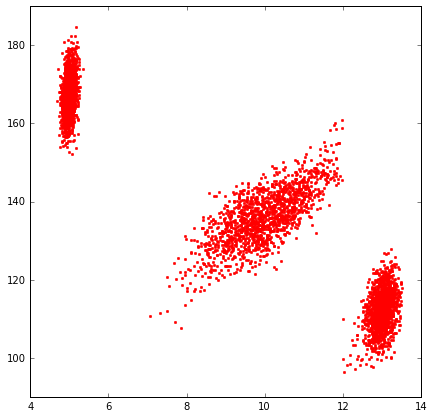

In [142]:
N = 1500
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]
# y = 2*x1
x1 = np.concatenate((np.random.normal(loc=10,scale=.9,size=N) , np.random.normal(loc=13,scale=.2,size=N),np.random.normal(loc=5,scale=.1,size=N)))[:,np.newaxis]


y =-.1*x1**3 + 2*x1*x1 + 7*np.sin(x1) + 3*np.sqrt(x1)+ 1*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]

y[y<100] =y[y<100] +100
y[x1>12] =y[x1>12] -50
# x_tmp = x1.copy()
# x1 = y
# y = x_tmp

# x1 = Data[:,0][:,np.newaxis]
# y = Data[:,1][:,np.newaxis]

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(x1,y,'.r',markersize=5,alpha=1 );



local polynomial with degree 5 is done in 6.54869318008 seconds
Global polynomial with degree 5 is done in 0.00224089622498 seconds


,local-degree-5,global-degree-5
0,3.883348,4.354582


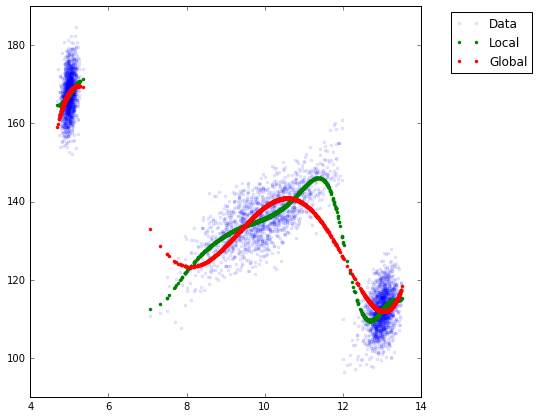

In [143]:
# It is use is pretty similar to the previous one
# Here, we use PyQt library

import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
import time
poly_order=5



y_preds_ = pd.DataFrame(data=np.zeros((y.shape[0],0)))
ARE = pd.DataFrame(data=np.zeros((y.shape[0],0)))
MAE = pd.DataFrame(data=np.zeros((1,0)))


t0 = time.time()
regr = smooth.NonParamRegression(x1.T, y[:,0], method=npr_methods.LocalPolynomialKernel(q=poly_order))
name = 'Poly-nonparametric-'+str(poly_order)
regr.fit()
y_preds_local = regr(x1.T)[:,np.newaxis]





print 'local polynomial with degree {} is done in {} seconds'.format(poly_order,time.time()-t0)




y_preds_['local-degree-{}'.format(poly_order)] = y_preds_local
MAE['local-degree-{}'.format(poly_order)] = np.mean(np.abs(y_preds_local-y))
ARE['local-degree-{}'.format(poly_order)] = 100*np.abs(y_preds_local-y)/y




t0 = time.time()
poly = PolynomialFeatures(degree=degree)
x1_ = poly.fit_transform(x1)
regr = linear_model.LinearRegression()
regr.fit(x1_, y)
y_preds_gloabal = regr.predict(x1_)
print 'Global polynomial with degree {} is done in {} seconds'.format(poly_order,time.time()-t0)



y_preds_['global-degree-{}'.format(poly_order)] = y_preds_gloabal
MAE['global-degree-{}'.format(poly_order)] = np.mean(np.abs(y_preds_gloabal-y))
ARE['global-degree-{}'.format(poly_order)] = 100*np.abs(y_preds_gloabal-y)/y




figure =plt.figure(figsize=(7,7))
plt.plot(x1, y, '.', alpha=0.1, label='Data')
plt.plot(x1, y_preds_local, '.g', alpha=1, label='Local')
plt.plot(x1, y_preds_gloabal, '.r', alpha=1, label='Global')
plt.legend(bbox_to_anchor = (1.3,1))

MAE


In [144]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE.shape[1])),index=quality,columns=ARE.columns)
for percent in quality:
    for m in range(ARE.shape[1]):
        a = ARE.values[:,m]
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
#         percentiles.ix[percent,m]= 100*(a<=percent).sum()/float(a.shape[0])
percentiles
med_error = pd.DataFrame(data=ARE.median(axis=0).values[:][np.newaxis,:].copy(),columns=ARE.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.ix[:] = np.around(percentiles.values[:],decimals=2)
# percentiles.index.name = 'ARE'
percentiles.T

,median,1,5,10,15,20
local-degree-5,2.35,22.76,83.53,98.78,99.80,99.87
global-degree-5,2.57,20.78,79.76,97.11,99.33,99.78



<hr style="height:4px;border:none;color:stillblue;background-color:black;" />
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />


# (Possibly) in the next session
* ** practice with scikit learn using different regression models**
    * Cross validation
    * performance evaluation
* **Structure Learning and Manifold learning** 
* **Space transformations and Representation learning**